In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, pickle
import pandas as pd
import seaborn as sns
rng = np.random.default_rng()

In [2]:
NE, NI, N_syl, N_HVC_per_syl = 600, 150, 1, 1
N_HVC = N_syl * N_HVC_per_syl

In [3]:
fnames = glob.glob('../results/EI_1HVC*.pkl')
df = dict(fid=[], state=[], exp=[], stage=[], recE_std=[])
for fname in fnames:
    with open(fname, 'rb') as f:
        d = pickle.load(f)
    for k1, n1 in zip(('fp', 'lc'), ('FP', 'Seq')):
        for k2, n2 in zip(('_pre', '_post'), ('Before Learning', 'After Learning')):
            for k3, v in d[k1+k2].items(): # Experiments
                if k3 == 'spon':
                    k3 = 'Spont.'
                if 'Singing' not in k3:
                    n2 = 'Unaffected by\nLearning'
                if n2 == 'Before Learning':
                    if 'Singing' in k3:
                        k3 = 'Singing\n(Before Learn)'
                    else:
                        continue # discard
                df['recE_std'].append(np.mean(v))
                df['exp'].append(k3)
                df['fid'].append(int(fname[:-4].split('_')[-1]))
                df['state'].append(n1)
                df['stage'].append(n2)

In [4]:
df = pd.DataFrame(df)

In [5]:
order = ['Spont.'] + sorted(df.exp.unique())[:-1]
hue_order = ['Before Learning', 'After Learning', 'Unaffected by\nLearning']

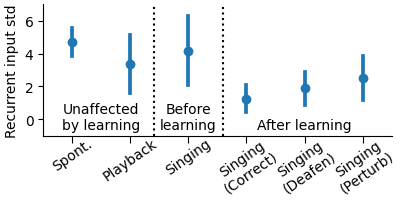

In [6]:
state = 'Seq'
fig, ax = plt.subplots(1, figsize=(4, 2))
sns.pointplot(df[df.state==state], x='exp', y='recE_std', ax=ax,
              order=order, linestyle='none', ms=5, 
              errorbar=('sd'), legend=False)
xt, xtl = ax.get_xticks(), ax.get_xticklabels()
xtl[2].set_text('Singing')
ax.axvline(xt[1]*0.6+xt[2]*0.4, ls=':', color='k')
ax.axvline(xt[2]*0.4+xt[3]*0.6, ls=':', color='k')
ax.text((xt[0]+xt[1])/2, -0.8, 'Unaffected\nby learning', ha='center', va='bottom')
ax.text(xt[2], -0.8, 'Before\nlearning', ha='center', va='bottom')
ax.text(xt[4], -0.8, 'After learning', ha='center', va='bottom')
ax.set_xticks(xt, xtl, rotation=35, ha='center', va='top')
ax.tick_params(axis='x', which='major', pad=-5, length=5)
ax.set(xlabel='', ylabel='Recurrent input std', ylim=[-1, 7])
fig.savefig('../svg/reduce_noise.svg')